In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('./fake_job_postings.csv')

In [3]:
# Preview file contents

df.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [4]:
# Analyzing the structure of the dataset

df.describe()

job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
# Displays the number of null values in each column

df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [8]:
# Job ID has a unique value for each entry - it won't help with our research

del df['job_id']

In [9]:
unique_salary = df['salary_range'].unique()
print(unique_salary[0:5])

[nan '20000-28000' '100000-120000' '120000-150000' '50000-65000']


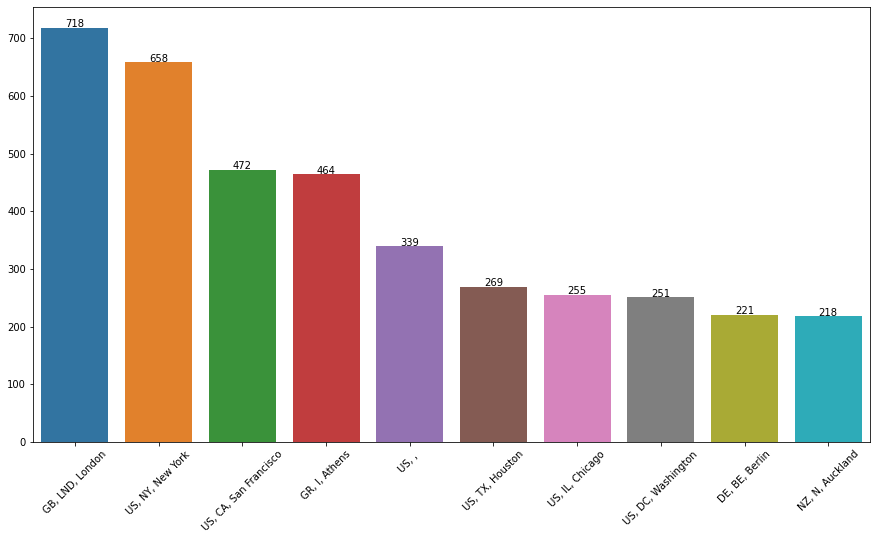

In [10]:
# Visualization of the distribution based on location of job

labels = df.location.value_counts().index[:10]
values = df.location.value_counts().values[:10]
plt.figure(figsize = (15, 8))

ax = sns.barplot(x=labels, y=values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.9, values[i], ha="center")

In [11]:
# The graph indicates most jobs in the dataset come from the cities:
# London, New York, and San Francisco

In [12]:
# Breakdown of job listings by corporate department

labels = df['department'].value_counts().index[:10]
values = df['department'].value_counts().values[:10]
irises_colors = ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)', 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']

fig = make_subplots(1, specs=[[{'type': 'domain'}]],subplot_titles=['Department'])
fig.add_trace(go.Pie(labels=labels, values=values, pull=[0.1,0,0,0,0,0,0,0,0], hole=.15, name="Department Top 10", marker_colors=irises_colors), 1, 1)
fig.update_layout(title_text='Department Top 10')
fig.show()

In [13]:
# As shown in the pie chart, job posting from the dataset are predominantly related to Sales, Engineering, Marketing, and Operations

In [14]:
df.fillna(" ",inplace = True)

In [15]:
df['text'] = df['title'].str.cat(df[['location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_education', 'industry', 'function']].astype(str), sep=' ')

In [16]:
df.text[0]

"Marketing Intern US, NY, New York Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food communi

In [17]:
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['employment_type']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']

In [18]:
# Removes non-english job listings

import langid

def detect_lang(x):
    code,_ = langid.classify(x)
    
    return code

df = df[df['text'].apply(lambda x: detect_lang(x) == 'en')]

df.head()

salary_range  telecommuting  has_company_logo  has_questions  fraudulent  \
0                           0                 1              0           0   
1                           0                 1              0           0   
2                           0                 1              0           0   
3                           0                 1              0           0   
4                           0                 1              1           0   

                                                text  
0  Marketing Intern US, NY, New York Marketing We...  
1  Customer Service - Cloud Video Production NZ, ...  
2  Commissioning Machinery Assistant (CMA) US, IA...  
3  Account Executive - Washington DC US, DC, Wash...  
4  Bill Review Manager US, FL, Fort Worth   SpotS...

In [19]:
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.head()

salary_range  telecommuting  has_company_logo  has_questions  fraudulent  \
0                           0                 1              0           0   
1                           0                 1              0           0   
2                           0                 1              0           0   
3                           0                 1              0           0   
4                           0                 1              1           0   

                                                text  
0  Marketing Intern US, NY, New York Marketing We...  
1  Customer Service - Cloud Video Production NZ, ...  
2  Commissioning Machinery Assistant (CMA) US, IA...  
3  Account Executive - Washington DC US, DC, Wash...  
4  Bill Review Manager US, FL, Fort Worth SpotSou...

In [20]:
df['text'] = df.text.str.replace(r'\W', ' ', regex=True)
df['text'] = df.text.str.replace(r'\b\d+', ' ', regex=True)
df['text'] = df.text.str.replace(r'\S{20,}', ' ', regex=True)
df['text'] = df.text.str.replace(r'\s{2,}', ' ', regex=True)

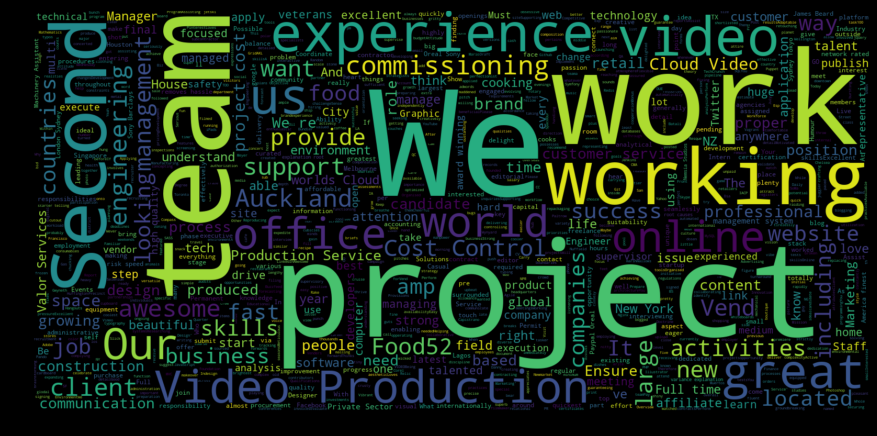

In [21]:
wordcloud = WordCloud(
    width = 1600,
    height = 768,
    max_words = 2500,
    background_color = 'black').generate(str(df.text.values))
fig = plt.figure(
    figsize = (15, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

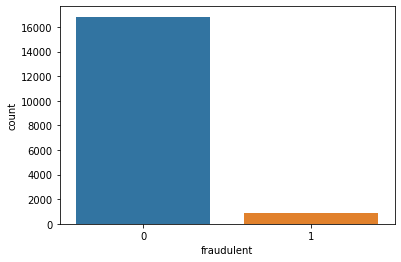

In [22]:
# Visualization of legitimate vs. fraudulent job listings
sns.countplot(x="fraudulent", data=df)

In [23]:
# Fraudulent jobs count
df[df.text.duplicated()].count()

salary_range        430
telecommuting       430
has_company_logo    430
has_questions       430
fraudulent          430
text                430
dtype: int64

In [24]:
# Legitimate jobs count
df = df.drop_duplicates()
print(len(df))
df.reset_index(drop=True, inplace=True)

17294


In [25]:
random_state = 0

real_df = df[df['fraudulent']==0].copy()
fake_df = df[df['fraudulent']==1].copy()

real_sampled_df = real_df.sample(n=3000, random_state=random_state)

final_df = pd.concat([real_sampled_df, fake_df], axis=0)

In [26]:
del df
del real_df
del real_sampled_df
del fake_df

In [27]:
from sklearn.model_selection import train_test_split

train_text , test_text ,train_category , test_category = train_test_split(final_df.text,final_df.fraudulent , test_size = 0.2 , random_state = 0)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(min_df=0)
#transformed train reviews
cv_train_reviews=cv.fit_transform(train_text)
#transformed test reviews
cv_test_reviews=cv.transform(test_text)

print('cv_train:',cv_train_reviews.shape)
print('cv_test:',cv_test_reviews.shape)


cv_train: (3081, 33245)
cv_test: (771, 33245)


In [29]:
from sklearn.naive_bayes import MultinomialNB

#training the model
model=MultinomialNB()
#fitting the nb for bag of words
fit_model=model.fit(cv_train_reviews,train_category)
print(fit_model)

MultinomialNB()


In [30]:
#Predicting the model
prediction=model.predict(cv_test_reviews)

In [31]:
from sklearn.metrics import accuracy_score

#Accuracy score
score=accuracy_score(test_category,prediction)
print("accuracy score :",score)

accuracy score : 0.940337224383917


In [32]:
from sklearn.metrics import classification_report

report = classification_report(test_category,prediction,target_names = ['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       584
           1       0.89      0.86      0.87       187

    accuracy                           0.94       771
   macro avg       0.92      0.91      0.92       771
weighted avg       0.94      0.94      0.94       771



In [33]:
from sklearn.metrics import confusion_matrix

cm_cv = confusion_matrix(test_category,prediction)

cm_cv

array([[564,  20],
       [ 26, 161]])

In [34]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

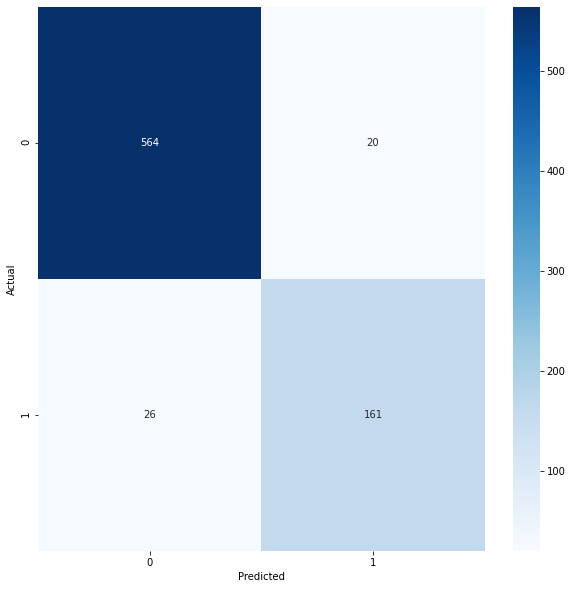

In [35]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')

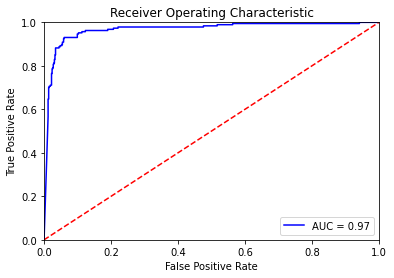

In [36]:
import sklearn.metrics as metrics

probs = model.predict_proba(cv_test_reviews)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_category, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
